In [5]:
import sys
sys.path.insert(0,'../../Clear-Skies')
sys.path.insert(0,'../../Optimus-Primal')
import numpy as np
from clearskies import solver
from clearskies import map_uncertainty
from astropy.io import fits
import matplotlib.pyplot as plt

In [6]:
def open_fits(image_file):
    hdu_list = fits.open(image_file)
    return hdu_list[0].data
def open_header(image_file):
    hdu_list = fits.open(image_file)
    return hdu_list[0].header

In [7]:
input_file = "../data/lmc.fits"

x_true = open_fits(input_file)
header = open_header(input_file)

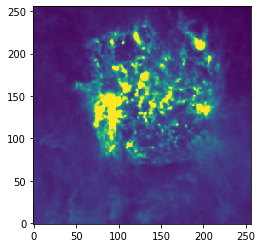

In [12]:
plt.imshow(x_true, vmax=np.max(x_true) * 0.1,origin='lower')

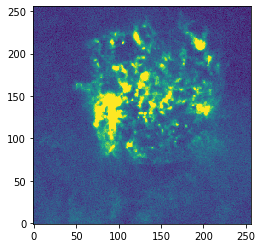

In [15]:
ISNR = 20.
sigma = 10**(-ISNR/20.) * np.sqrt(np.sum(np.abs(x_true)**2)/(x_true.shape[0] * x_true.shape[1]))
width, height = x_true.shape 

W = np.ones(x_true.shape)

y = W * x_true + np.random.normal(0, sigma, x_true.shape)
plt.imshow(y, vmax=np.max(y) * 0.1,origin='lower')

In [16]:
wav = ["db1", "db2", "db3", "db4","db5", "db6", "db7", "db8"]
#wav = ["db8"]
#wav = ["dirac"]
levels = 4

In [25]:
options = {'tol': 1e-3, 'iter': 5000, 'update_iter': 50, 'record_iters': False, 'positivity': False, 'real': False}
beta = 1e-3

In [26]:
z, diag = solver.solver(solver.algorithm.l1_constrained, y, sigma, W, wav, levels, beta, options)

2020-05-13 14:35:15,774 - Clear Skies - INFO - Using wavelets ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8'] with 4 levels
2020-05-13 14:35:15,775 - Clear Skies - INFO - Using an estimated noise level of 0.8525821286015454 (weighted image units, i.e. Jy/Beam)
2020-05-13 14:35:15,820 - Clear Skies - INFO - Denosing using constrained l1 regularization
2020-05-13 14:35:15,919 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2020-05-13 14:35:16,016 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.333333
2020-05-13 14:35:21,215 - Optimus Primal - INFO - [Primal Dual] converged in 36 iterations


Input SNR =  20.0
Recovered SNR =  25.581759303028548


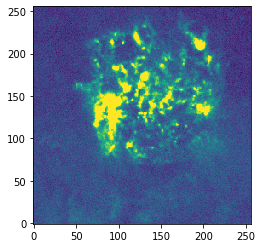

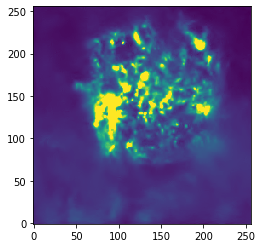

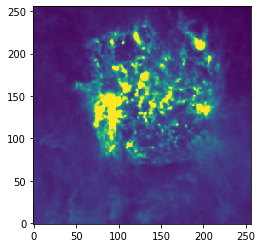

In [28]:
SNR = np.log10(np.sqrt(np.sum(np.abs(x_true)**2))/np.sqrt(np.sum(np.abs(x_true - z)**2))) * 20.
print("Input SNR = ", ISNR)
print("Recovered SNR = ", SNR)
plt.figure()
plt.imshow(np.real(y), vmax=np.max(x_true) * 0.1,origin='lower')
plt.figure()
plt.imshow(np.real(z), vmax=np.max(x_true) * 0.1,origin='lower')
plt.figure()
plt.imshow(np.real(x_true), vmax=np.max(x_true) * 0.1,origin='lower')

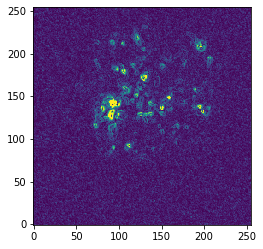

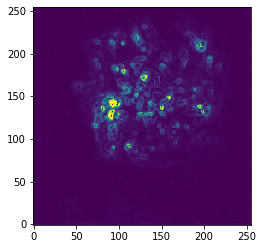

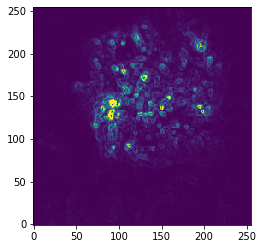

In [32]:
plt.figure()
plt.imshow(np.sqrt((np.diff(np.real(y[:,:-1]),axis=0)**2 + np.diff(np.real(y[:-1,:]),axis=1)**2)), vmax=np.max(x_true) * 0.1,origin='lower')
plt.figure()
plt.imshow(np.sqrt((np.diff(np.real(z[:,:-1]),axis=0)**2 + np.diff(np.real(z[:-1,:]),axis=1)**2)), vmax=np.max(x_true) * 0.1,origin='lower')
plt.figure()
plt.imshow(np.sqrt((np.diff(np.real(x_true[:,:-1]),axis=0)**2 + np.diff(np.real(x_true[:-1,:]),axis=1)**2)), vmax=np.max(x_true) * 0.1,origin='lower')